---
# **Table of Contents**
---
**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-profiing**](#Section5)<br>
  
**6.** [**Data Pre-processing**](#Section6)<br>

**7.** [**Feature Engineering**](#Section7)<br>
  - **7.1** [**Separating nemeric and categorical variable**](#Section71)
  - **7.2** [**Creating new variable- Price category**](#Section72)

**8.** [**Exploratory Data Analysis**](#Section8)<br>

**9.** [**Data Preparation**](#Section9)<br>
  - **9.1** [**Creating dependent and independent variable**](#Section91)
  - **9.2** [**Encoding categorical variables**](#Section92)
  - **9.3** [**Splitting data into train test data**](#Section93)

**10.** [**Model Development & Evaluation**](#Section10)<br>
  - **10.1** [**Linear Regression - Baseline Models**](#Section101)
  - **10.2** [**Train Accuracy**](#Section102)
  - **10.3** [**Test Accuracy**](#Section103)

**11.** [**Application on test data**](#Section11)<br>
  
**12.** [**Conclusion**](#Section12)<br>

# Car Price Prediction

## 1. Introduction

* SWIPECAR, is an American company that buys and sells second hand cars.
* They initiated their business in the late 80s and have gained huge popularity over the years.
* The company clients are local and foreign customers who seek to buy and sell second hand cars.

#### Current Scenario:

* Company has started facing loss in business due to the technical advancements.
* There are several competitors in the market who have been using enhanced techniques.
* The company is pretty old and they have been using traditional measures to estimate old cars prices.
* These traditional measures include weight analysis, condition of parts and build year.
* They are looking for a more robust way to estimate the price of old cars.

## 2. Problem Statement

The current process suffers from the following problems:

* They have been using manual traditional measures to estimate old cars prices.
* These measures are time consuming and not accurate.
* Company is looking for a robust way to estimate the prices of used cars.
* They decided to hire a team of data scientists to find an automated way to get rid of their manual work and to build a regression model using the provided data.

# 3.   Installing and Importing Libraries

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score            
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression                   # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

from sklearn.metrics import mean_squared_error, r2_score

# 4. Data Acquisition and Description

In [3]:
# Importing data
train = pd.read_csv('TrainData.csv')
test = pd.read_csv('TestData.csv')

In [4]:
# Checking first 5 rows of train data
train.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985


In [5]:
# Checking first 5 rows of test data
test.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2912,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114,5400,23,28
1,2,0,188,bmw,gas,std,four,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2765,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121,4250,21,28
2,3,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.30000,188.80000,67.20000,57.50000,3157,ohc,four,130,mpfi,3.62000,3.15000,7.50000,162,5100,17,22
3,4,1,154,plymouth,gas,std,four,sedan,fwd,front,93.70000,167.30000,63.80000,50.80000,1989,ohc,four,90,2bbl,2.97000,3.23000,9.40000,68,5500,31,38
4,5,1,103,nissan,gas,std,four,wagon,fwd,front,94.50000,170.20000,63.80000,53.50000,2037,ohc,four,97,2bbl,3.15000,3.29000,9.40000,69,5200,31,37


# 4.1 Data Description

The Dataset contains the following columns:

1. ID:	Feature uniquely identifying each record

2. symbolling:	Degree to which the auto is riskier than its price indicates.

3. normalized-losses:	Relative average loss payment per insured vehicle year.

4. make:	Make of the car.

5. fuel-type:	Type of fuel consumed by the car.

6. aspiration:	Type of internal combustion engine used.

7. num-of-doors:	Number of doors available in the car.

8. body-style:	Body style of car.

9. drive-wheels:	Drive wheel of car.

10. engine-location:	Location of engine in car.

11. wheel-base:	Distance between the centres of the front and rear wheels.

12. length:	Length of the car.

13. width:	Width of the car.

14. height:	Height of the car.

15. curb-weight:	Total mass of a vehicle with standard equipment.

16. engine-type:	Type of engine used in the car.

17. num-of-cylinders:	Number of cylinders used in the car.

18. engine-size:	Size of the engine used in the car.

19. fuel-system:	Type of fuel system used in the car.

20. bore:	Diameter of each cylinder in the piston engine.

21. stroke:	Full travel of the piston along the cylinder, in either direction.

22. compression-ratio:	Volume of the cylinder and the combustion chamber when the piston is at the bottom, and the volume of the combustion chamber when the piston is at the top.

23. horsepower:	The power an engine produces by a car.

24. peak-rpm:	The max power produced by engine in terms of revolutions per minute.

25. city-mpg:	City mileage per gallon rating of car.

26. highway-mpg:	Highway mileage per gallon rating of car.

27. price:	Price of the car.

## 4.2 Data Information

In [6]:
# Checking shape of data
print ("Rows     : " ,train.shape[0])
print ("Columns  : " ,train.shape[1])

# Various features
print ("\nFeatures : \n" ,train.columns.tolist())

# Missing values
print ("\nMissing values :  ", train.isnull().sum().values.sum())

# Checking count and unique values in each column
for i in train.columns:
  print(f"Unique {i}'s count: {train[i].nunique()}")
  print (f"{train[i].unique()}\n")

Rows     :  181
Columns  :  27

Features : 
 ['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing values :   0
Unique ID's count: 181
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 1

# 5. Data PreProfiling

In [7]:
# data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

* There are no missing values.
* bore, stroke, horsepower, peakrpm should have neumeric dtype.
* symboling (risk factor) can be converted to object.

In [8]:
# Descriptive satistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,181.00000,91.00000,52.39434,1.00000,46.00000,91.00000,136.00000,181.00000
symboling,181.00000,0.85083,1.26704,-2.00000,0.00000,1.00000,2.00000,3.00000
wheel-base,181.00000,98.72928,6.11620,86.60000,94.50000,96.90000,102.40000,120.90000
length,181.00000,174.17403,12.33657,141.10000,166.80000,173.20000,183.10000,208.10000
width,181.00000,65.94365,2.14611,60.30000,64.20000,65.50000,66.60000,72.00000
height,181.00000,53.70994,2.49773,47.80000,51.60000,54.10000,55.50000,59.80000
curb-weight,181.00000,2564.16575,523.48902,1488.00000,2190.00000,2420.00000,2935.00000,4066.00000
engine-size,181.00000,127.90055,42.57844,61.00000,98.00000,120.00000,146.00000,326.00000
compression-ratio,181.00000,10.15425,3.98231,7.00000,8.60000,9.00000,9.40000,23.00000
city-mpg,181.00000,25.13260,6.41821,13.00000,19.00000,24.00000,30.00000,49.00000


In [9]:
# Checking for duplicate rows
train.duplicated().any()

False

# 6. Data Preprocessing

In [10]:
def data_manipulation(df):

  # dropping the ID column as it will not be useful in predicting our dependent variable
  df.drop(columns="ID", inplace=True)

  # Replacing ? values in normalized losses with the mode of the remaining data
  df1 = train.where(df["normalized-losses"] != '?')

  df["normalized-losses"] = df["normalized-losses"].replace('?', df1["normalized-losses"].mode()[0])

  # Replacing ? values in normalized losses with the mode 
  df["num-of-doors"] = df["num-of-doors"].replace('?',df["num-of-doors"].mode()[0])
  df["horsepower"] = df["horsepower"].replace('?', df["horsepower"].mode()[0])
  df["peak-rpm"] = df["peak-rpm"].replace('?', df["peak-rpm"].mode()[0])
  df["bore"] = df["bore"].replace('?', df["bore"].mode()[0])
  df["stroke"] = df["stroke"].replace('?', df["stroke"].mode()[0])

  # converting from numeric to categorical variable type
  df["symboling"] = df["symboling"].astype(str)

In [11]:
data_manipulation(train)

In [12]:
# Converting features from categorical to neumeric
feature_list = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

def feature_to_float(feature_list,df):
  for i in feature_list:
    df[i] = df[i].astype(float)

In [ ]:
feature_to_float(feature_list,train)

In [14]:
# checking for data type of various features
train.dtypes

symboling             object
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

* All the data types have been corrected

# 7. Feature Engineering

### 7.1 Separating neumeric and categorical variables

In [15]:
# creating list of numeric and categorical columns
col_numeric = list(train.select_dtypes(exclude="object"))

col_categorical = list(train.select_dtypes(include="object"))

### 7.2 Creating new feature price_category

In [16]:
# categorizing price into standard and high-end
train["price_category"] = train["price"].apply(lambda x: "standard" if x <= 18500 else "high-end")

# 8. Exploratory Data Analysis

### Q1 Which are the top 'make' of cars? 

Text(0.5, 1.0, 'Top car Brands')

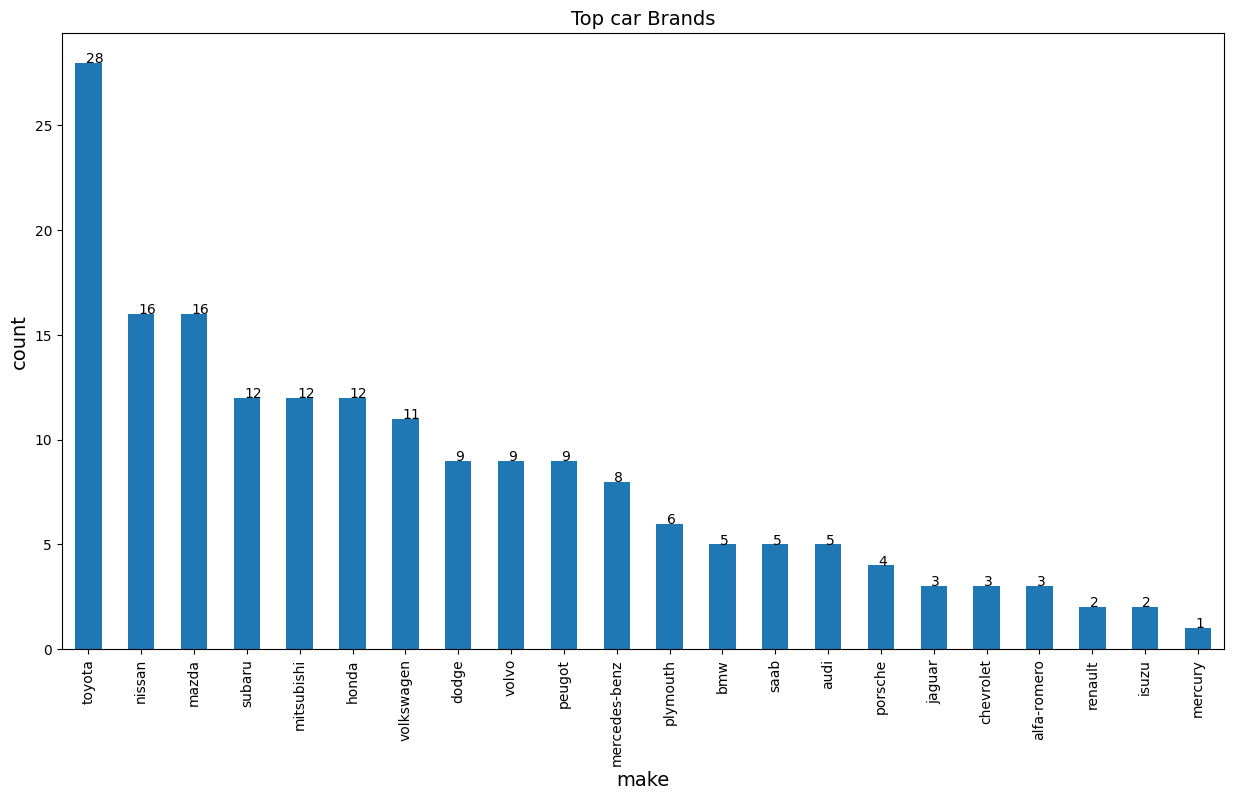

In [17]:
# Visualizing count of various car brands
fig = plt.figure(figsize = [15, 8])

ax = train['make'].value_counts().plot(kind='bar')
for p in ax.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + p.get_width() / 2.5
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
plt.xlabel(xlabel = 'make', size = 14)
plt.ylabel(ylabel = 'count', size = 14)
plt.title(label = 'Top car Brands', size = 14)

## Insight

* Highest selling car brand is Toyota, followed by nissan and mazda.
* Lowest selling car brand is mercury.

In [18]:
# Creating copy of col_categorical 
col_categorical_pc = col_categorical.copy()

# Removing column 'make' from list of categorical variables
col_categorical_pc.remove('make')
col_categorical_pc

['symboling',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [19]:
train['symboling'].value_counts()

0     59
1     45
2     28
3     26
-1    21
-2     2
Name: symboling, dtype: int64

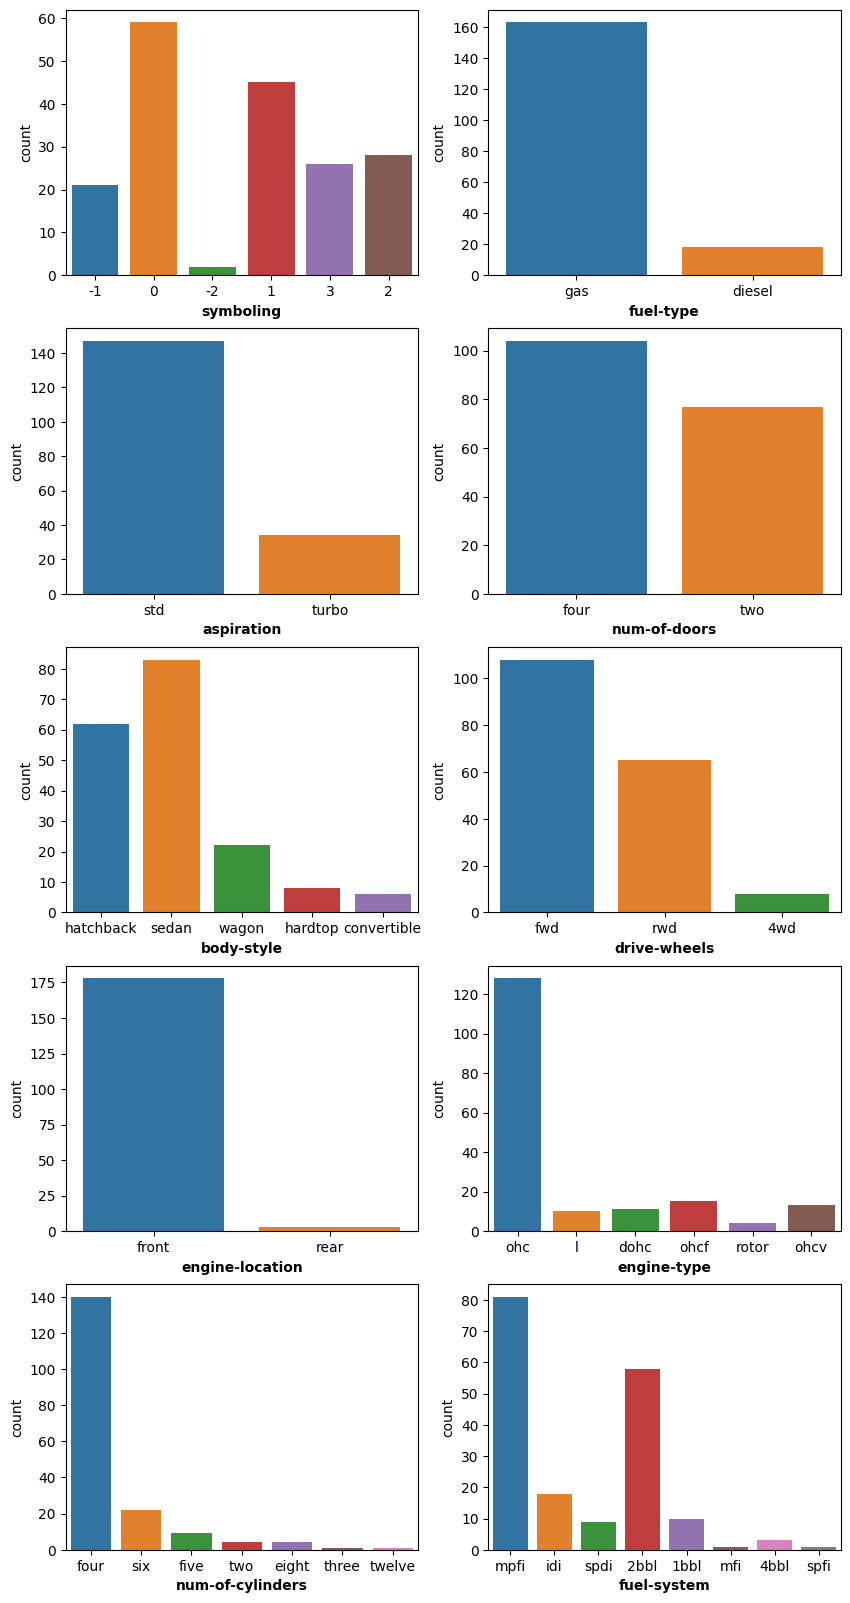

In [20]:
# visualizing the other categorical variables
plt.figure(figsize=(10,20))

for i,col in enumerate(col_categorical_pc, start=1):
    plt.subplot(5,2,i)
    sns.countplot(data=train, x=col, y=None)
    plt.xlabel(col, fontweight="bold")
plt.show()


## Insights

* symboling: most of the cars have risk factor in range -1 to 1
* fuel type: Cars having fuel type 'Gas' is more in demand
* Aspiration: Majority of the cars are standard (or normal) type
* num of doors: number of doors doesn't seems to have any impact on car sell.
* body style: Most of the cars are sedan or hatchback type
* drive-wheel: fwd is most common and 4wd is least common
* engine-location: More than 95% cars have 'front' Engine location
* engine-type: 65% of the cars have engine type 'ohc'
* num-of-cylinders: 90% of the cars are having 4 cylinders
* fuel-system: Majority of the cars are mpfi and 2bbl type

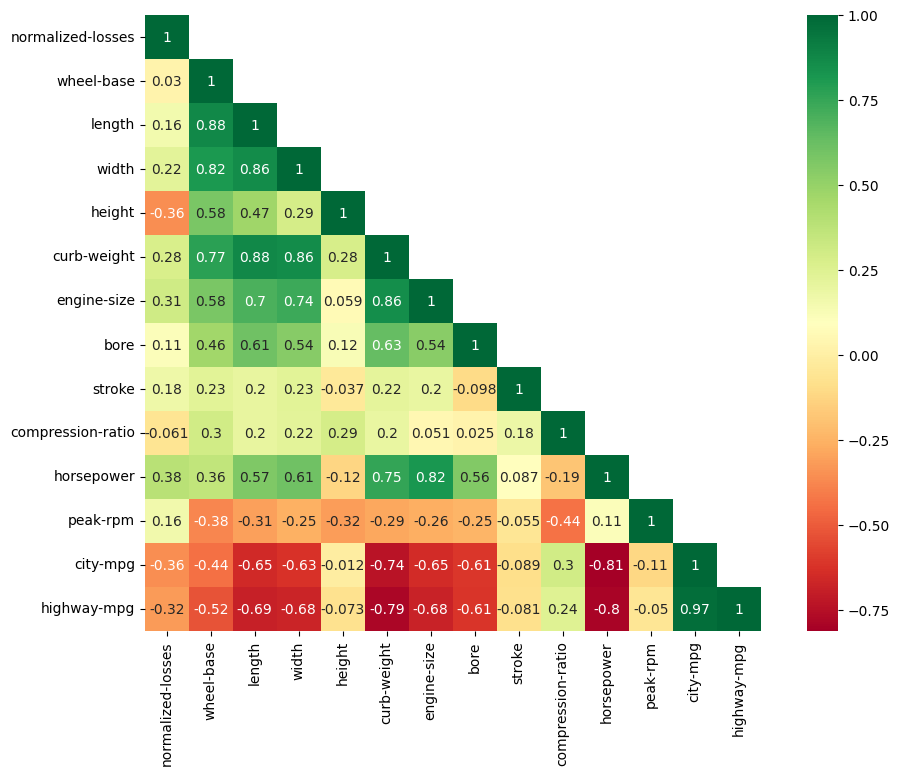

In [21]:
# heatmap to visualize the pearson's correlation matrix between the numeric variables (except price)
plt.figure(figsize=(12,8))
sns.heatmap(train.drop(columns="price").corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(train.drop(columns="price").corr(), k=1))
plt.show()

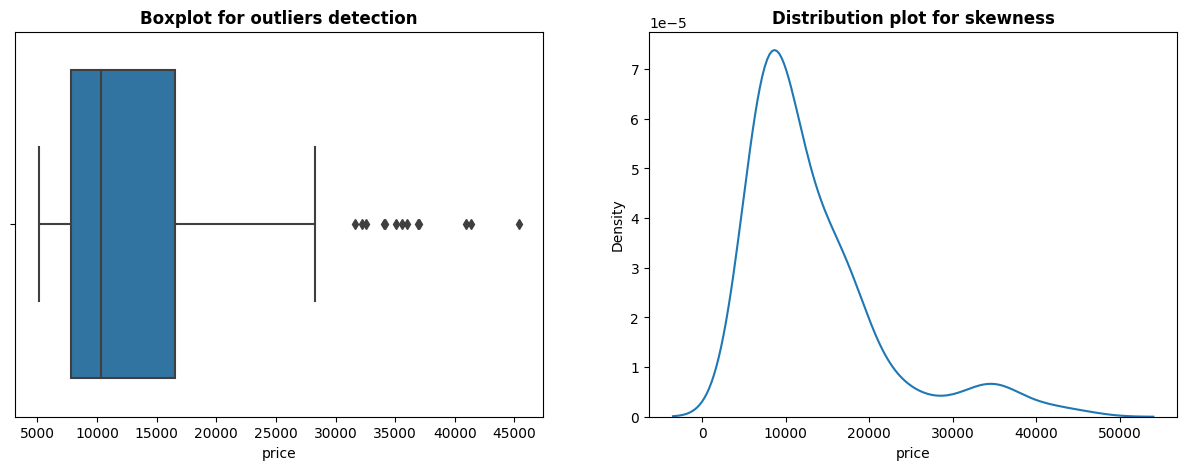

In [22]:
# visualizing our dependent variable for outliers and skewness
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x = train["price"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1,2,2)
sns.kdeplot(train["price"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

* There are few outliers towards the higher price range. This means that there are few high price models.
* Most of the cars in the price range 5000-18000.

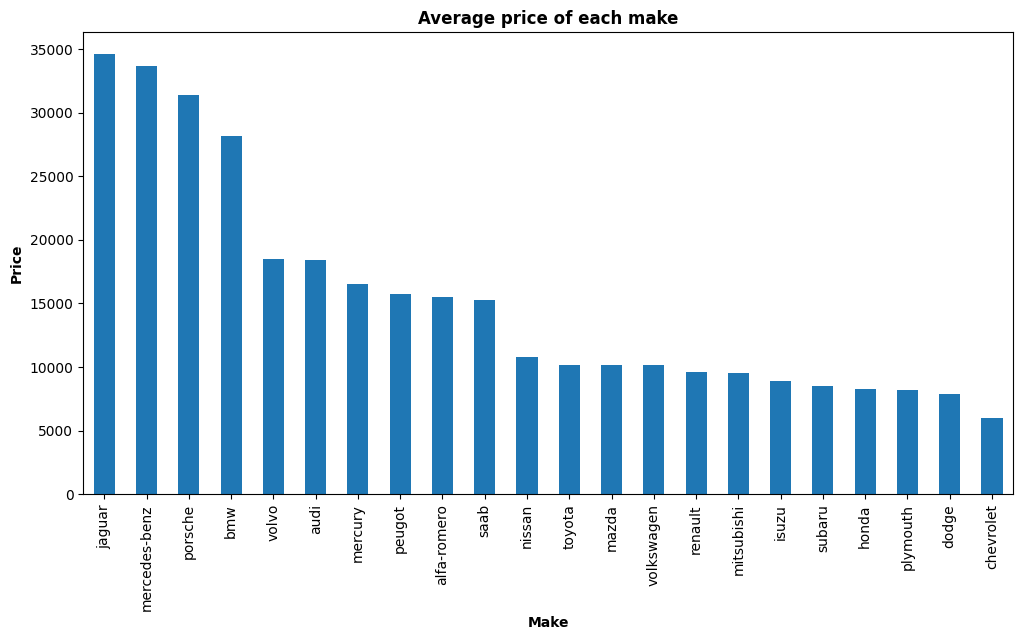

In [23]:
# average price of each make
train.groupby("make")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each make", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("Make", fontweight="bold")
plt.show()

* Jaguar make has the highest average price, followed by mercedes-benz, porche and BMW.
* Cheverolet has the lowest average price.

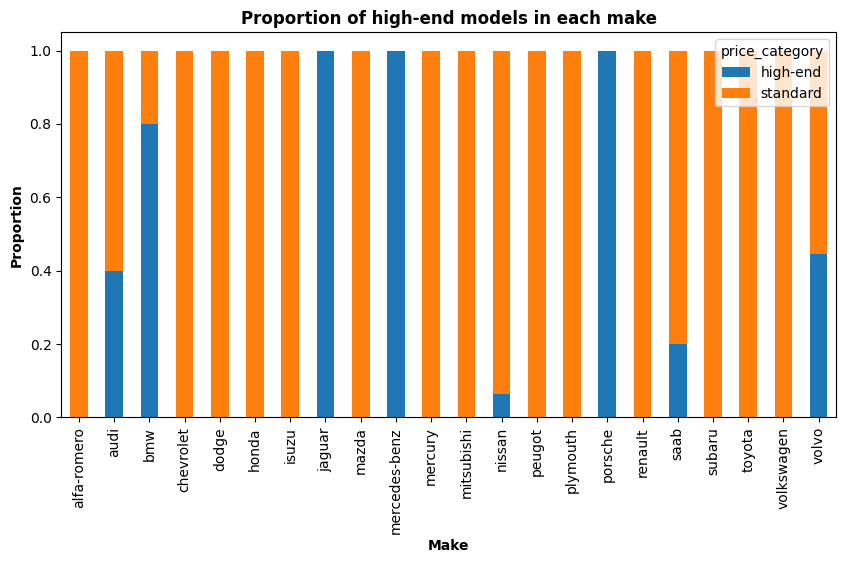

In [24]:
# proportion of high-end models in each make
pd.crosstab(train["make"], train["price_category"], normalize="index").plot.bar(stacked=True, figsize=(10,5))
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Proportion", fontweight="bold")
plt.title("Proportion of high-end models in each make", fontweight="bold")
plt.show()

## Insights:

* mercedes-benz, jaguar and porsche have high-end models only.
* bmw is having 80% of their models as high-end.
* volvo is having equal proportion of high-end and standard price models.
* audi, nissan and saab are having less than 40% of models as high-end.
* The rest (majority) of the car makers are having only standard price models.

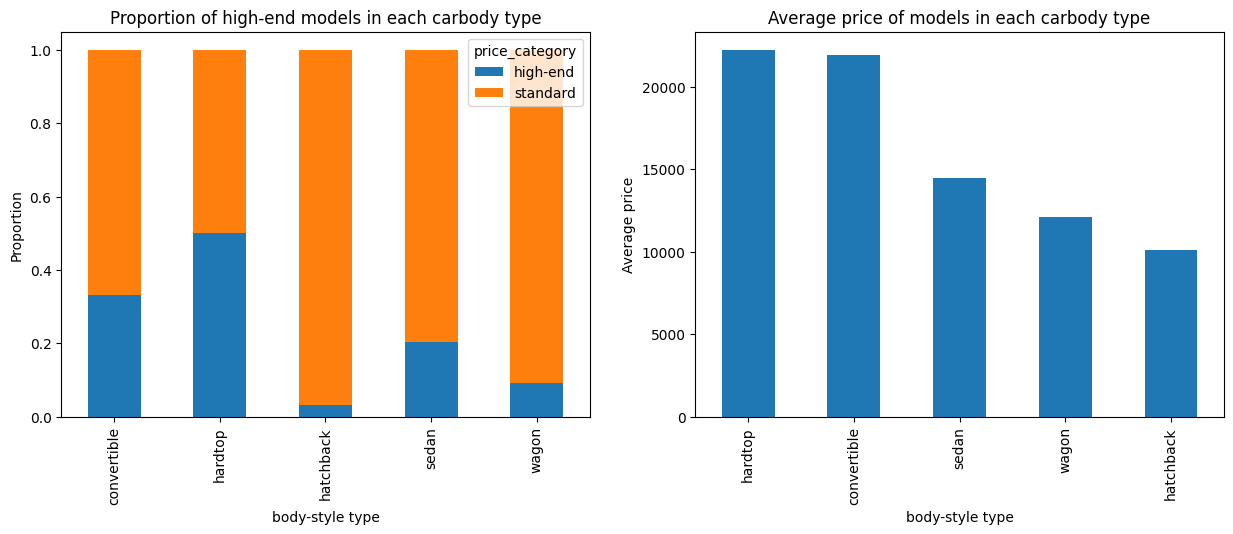

In [25]:
# price analysis for each carbody type
fig, ax = plt.subplots(1,2, figsize=(15,5))

pd.crosstab(train["body-style"], train["price_category"], normalize="index").plot.bar(stacked=True, ax=ax[0])
ax[0].set(xlabel="body-style type", ylabel="Proportion", title="Proportion of high-end models in each carbody type")

train.groupby("body-style")["price"].mean().sort_values(ascending=False).plot.bar(ax=ax[1])
ax[1].set(xlabel="body-style type", ylabel="Average price", title="Average price of models in each carbody type")

plt.show()

## Insight

* hardtop and convertible are having highest average price, and also high proportion of high-end price models.

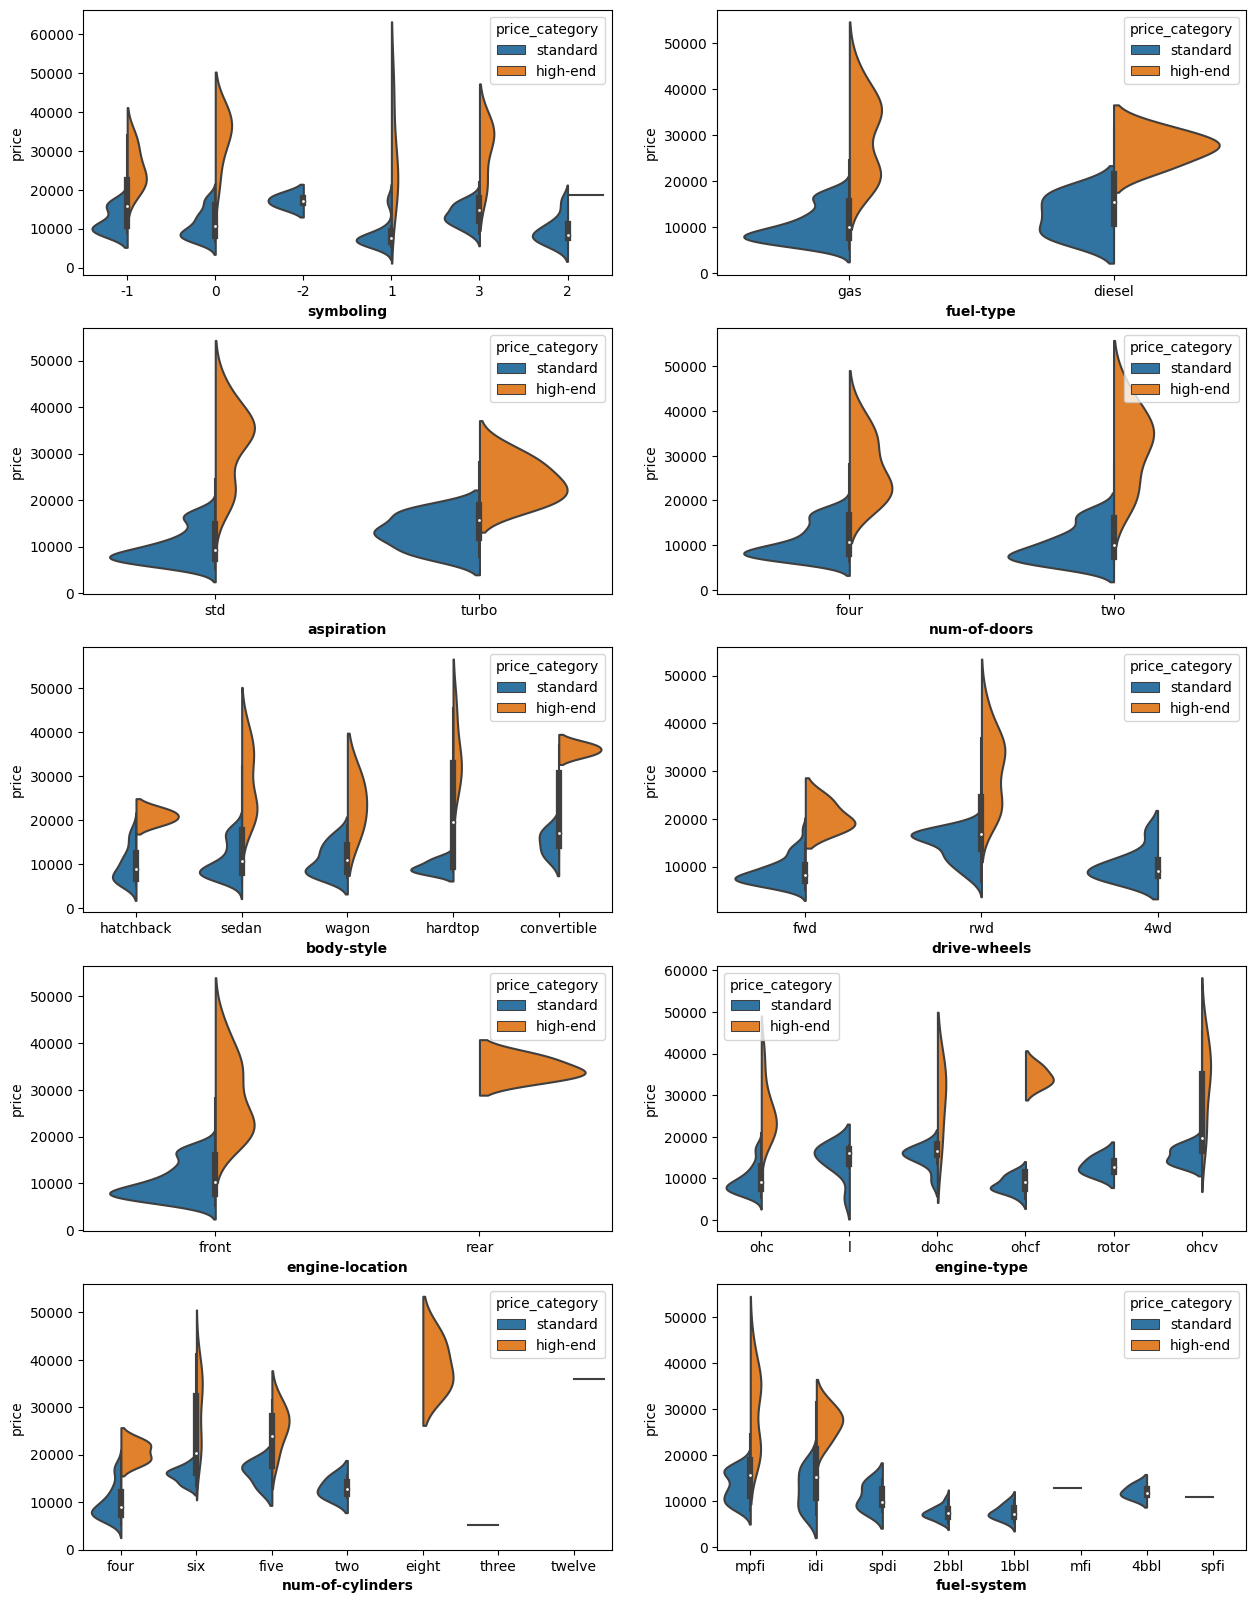

In [26]:
# visualizing distribution of price with the other categorical variables
plt.figure(figsize=(15,20))
for i,col in enumerate(col_categorical_pc, start=1):
    plt.subplot(5,2,i)
    sns.violinplot(data=train, x=col, y="price", split=True, hue="price_category")
    plt.xlabel(col, fontweight="bold")
plt.show()

## Insights:

* price and symboling, fueltype, doornumber, body-style doesn't seem to have much correlation.
* Safest (symboling -2) seems to have only standard priced models.
* price and drivewheel seems to have little correlation. All 4 wheel drive models are standard priced models.
* price and enginelocation seems to have correlation. All the rear engine models are high-end models.
* price and enginetype seems to have little correlation. While standard priced models are having all types of engines, high-end models are having 'dohc', 'ohc', 'ohcv' and 'ohcf' engine types.
* price and cylindernumber seems to have correlation. As the number of cylinders increases price of the model increases.
* price and fuelsystem seems to have little correlation. High-end models are having only 'idi' and 'mpfi' fuel systems.

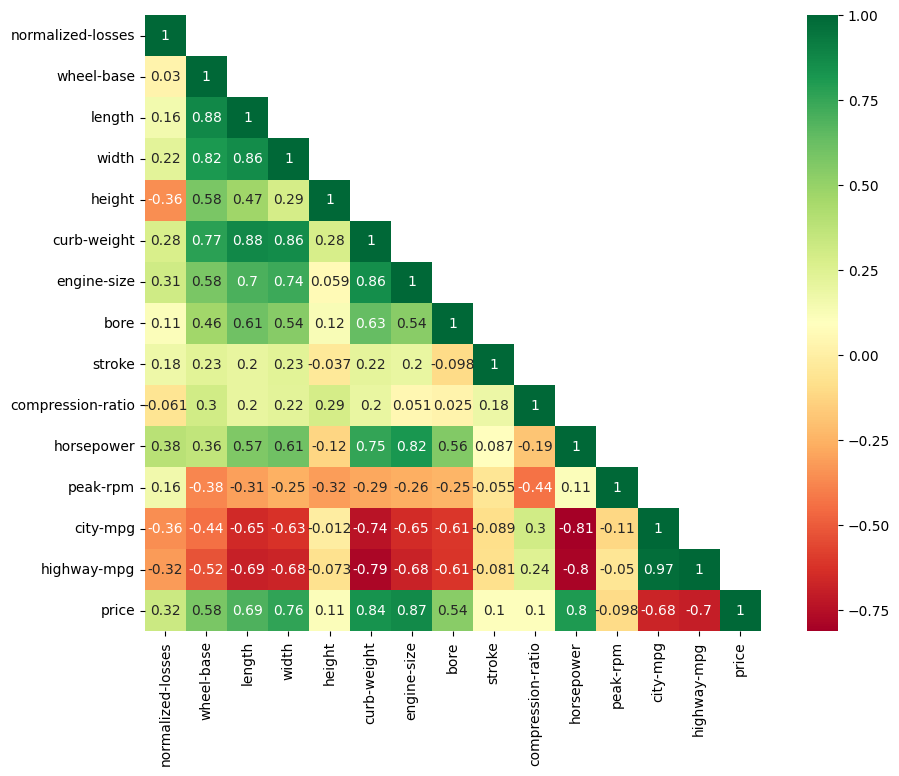

In [27]:
# heatmap to visualize the pearson's correlation between price and other the numeric variables
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(train.corr(), k=1))
plt.show()

## Insights

* price has high positive correlation with curb-weight, engine-size and horsepower.
* price has high negative correlation with mpg.

# 9. Data Preparation

# 9.1. Creating dependent and independent variable

In [28]:
# Dropping price-category from train data 
train.drop(columns=["price_category"], axis=1, inplace = True)

In [29]:
# independent variables
X = train.drop('price', axis=1)

# dependent variable
y = train["price"]

In [30]:
# Checking shape of X and y
print(X.shape)
print(y.shape)

(181, 25)
(181,)


## 9.2. Encoding Categorical Features

### Converting categorical variables into numeric

In [31]:
# Converting categorical variable into numeric type
def df_encoded(df):
  for i in df.columns:
    if df[i].dtype=='object':
      df[i] = pd.factorize(df[i])[0] 

In [32]:
df_encoded(X)

In [33]:
# Checking shape of X after encoding
X.shape

(181, 25)

In [34]:
# Checking first 5 rows of encoded X
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,65.00000,0,0,0,0,0,0,0,102.40000,175.60000,66.50000,53.90000,2458,0,0,122,0,3.31000,3.54000,8.70000,92.00000,4200.00000,27,32
1,1,188.00000,1,0,0,1,1,1,0,101.20000,176.80000,64.80000,54.30000,2710,0,1,164,0,3.31000,3.19000,9.00000,121.00000,4250.00000,21,28
2,1,161.00000,2,0,0,0,2,0,0,96.10000,181.50000,66.50000,55.20000,2579,0,0,132,0,3.46000,3.90000,8.70000,68.00000,4800.00000,23,31
3,1,161.00000,3,1,1,0,1,1,0,107.90000,186.70000,68.40000,56.70000,3197,1,0,152,1,3.70000,3.52000,21.00000,95.00000,4150.00000,28,33
4,2,103.00000,4,0,0,0,1,1,0,104.30000,188.80000,67.20000,56.20000,2935,0,0,141,0,3.78000,3.15000,9.50000,114.00000,5400.00000,24,28


## 9.3 Splitting the data into train test data

In [35]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of train and test data
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (144, 25) (144,)
Testing Data Shape: (37, 25) (37,)


# 10. Model Development and Evaluation

## 10.1 Linear Regression- Baseline Model

In [36]:
# Fitting the model on train data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting for train data
preds_train_lr = lr.predict(X_train)

# predicting for test data
preds_test_lr = lr.predict(X_test)

## 10.2 Train Accuracy

In [37]:
# RMSE score for train data
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train_lr))

# R-squared score for train data
r_sq_train = r2_score(y_train, preds_train_lr)

## 10.3 Test Accuracy

In [38]:
# RMSE score for test data
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test_lr))

# R-squared score for test data
r_sq_test = r2_score(y_test, preds_test_lr)

In [39]:
# printing RMSE for the train and test data
print('The RMSE for the train data is: ', round(rmse_train, 2))
print('The RMSE for the test data is: ', round(rmse_test, 2))

# printing R-Squared Value for the train and test data
print('The R-Squared Value for Train is: ', round(r_sq_train,2))
print('The R-Squared Value for Test is: ', round(r_sq_test, 2))

The RMSE for the train data is:  2614.75
The RMSE for the test data is:  2518.79
The R-Squared Value for Train is:  0.89
The R-Squared Value for Test is:  0.91


## 11. Application on Test data

In [40]:
# Test dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20 non-null     int64  
 1   symboling          20 non-null     int64  
 2   normalized-losses  20 non-null     object 
 3   make               20 non-null     object 
 4   fuel-type          20 non-null     object 
 5   aspiration         20 non-null     object 
 6   num-of-doors       20 non-null     object 
 7   body-style         20 non-null     object 
 8   drive-wheels       20 non-null     object 
 9   engine-location    20 non-null     object 
 10  wheel-base         20 non-null     float64
 11  length             20 non-null     float64
 12  width              20 non-null     float64
 13  height             20 non-null     float64
 14  curb-weight        20 non-null     int64  
 15  engine-type        20 non-null     object 
 16  num-of-cylinders   20 non-nu

In [41]:
# Data manipulation for test data
data_manipulation(test)

In [42]:
# Changing categorical datatype to numeric in test data
feature_to_float(feature_list,test)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,-2,103.00000,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2912,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114.00000,5400.00000,23,28
1,0,188.00000,bmw,gas,std,four,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2765,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121.00000,4250.00000,21,28
2,-1,74.00000,volvo,gas,turbo,four,wagon,rwd,front,104.30000,188.80000,67.20000,57.50000,3157,ohc,four,130,mpfi,3.62000,3.15000,7.50000,162.00000,5100.00000,17,22
3,1,154.00000,plymouth,gas,std,four,sedan,fwd,front,93.70000,167.30000,63.80000,50.80000,1989,ohc,four,90,2bbl,2.97000,3.23000,9.40000,68.00000,5500.00000,31,38
4,1,103.00000,nissan,gas,std,four,wagon,fwd,front,94.50000,170.20000,63.80000,53.50000,2037,ohc,four,97,2bbl,3.15000,3.29000,9.40000,69.00000,5200.00000,31,37
5,2,94.00000,volkswagen,diesel,turbo,four,sedan,fwd,front,97.30000,171.70000,65.50000,55.70000,2319,ohc,four,97,idi,3.01000,3.40000,23.00000,68.00000,4500.00000,37,42
6,0,118.00000,mazda,gas,std,four,sedan,rwd,front,104.90000,175.00000,66.10000,54.40000,2670,ohc,four,140,mpfi,3.76000,3.16000,8.00000,120.00000,5000.00000,19,27
7,0,161.00000,peugot,gas,std,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3020,l,four,120,mpfi,3.46000,3.19000,8.40000,97.00000,5000.00000,19,24
8,1,101.00000,honda,gas,std,two,hatchback,fwd,front,93.70000,150.00000,64.00000,52.60000,1956,ohc,four,92,1bbl,2.91000,3.41000,9.20000,76.00000,6000.00000,30,34
9,2,161.00000,mitsubishi,gas,std,two,hatchback,fwd,front,93.70000,157.30000,64.40000,50.80000,1944,ohc,four,92,2bbl,2.97000,3.23000,9.40000,68.00000,5500.00000,31,38


In [43]:
# Changing categorical to numeric variable in test data
df_encoded(test)

In [44]:
# Checking test data after encoding
test.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,103.00000,0,0,0,0,0,0,0,104.30000,188.80000,67.20000,56.20000,2912,0,0,141,0,3.78000,3.15000,9.50000,114.00000,5400.00000,23,28
1,1,188.00000,1,0,0,0,0,0,0,101.20000,176.80000,64.80000,54.30000,2765,0,1,164,0,3.31000,3.19000,9.00000,121.00000,4250.00000,21,28
2,2,74.00000,0,0,1,0,1,0,0,104.30000,188.80000,67.20000,57.50000,3157,0,0,130,0,3.62000,3.15000,7.50000,162.00000,5100.00000,17,22
3,3,154.00000,2,0,0,0,0,1,0,93.70000,167.30000,63.80000,50.80000,1989,0,0,90,1,2.97000,3.23000,9.40000,68.00000,5500.00000,31,38
4,3,103.00000,3,0,0,0,1,1,0,94.50000,170.20000,63.80000,53.50000,2037,0,0,97,1,3.15000,3.29000,9.40000,69.00000,5200.00000,31,37


In [45]:
# Predicting price for test dataset
price_test = lr.predict(test)

In [46]:
# Checking the predicted price values
price_test

array([15261.25083477, 15678.42727669, 16787.35356574,  7379.0565947 ,
        7163.73647599,  8056.238024  , 16268.15746401, 13640.83727496,
        8629.5399542 ,  9054.27338334, 19932.04469791,  7251.70423178,
        7162.16717336,  7201.10595189, 19792.7908256 , 25402.1097152 ,
        9233.54064195, 19104.88074145, 13200.88847368,  8587.40116671])

# 12. Conclusion

* I have created a Linear Regression - baseline model.
* Using the model, I have predicted price of cars in the test dataset.